In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [87]:
data = pd.read_csv("/home/vatsal/Downloads/seattleWeather_1948-2017.csv")

In [88]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [89]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [90]:
data = data.dropna()

In [91]:
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [92]:
type(data['DATE'][0])

str

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null object
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ MB


In [94]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [95]:
data.head(1)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True


In [96]:
 data['DATE'] = pd.to_datetime(data['DATE'])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null datetime64[ns]
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.4+ MB


In [98]:
data['DAY'] = data['DATE'].apply(lambda d: d.day)
data['MONTH'] = data['DATE'].apply(lambda m: m.month)
data['YEAR'] = data['DATE'].apply(lambda y: y.year)
data = data.drop('DATE',axis=1)

In [99]:
data.head()

,PRCP,TMAX,TMIN,RAIN,DAY,MONTH,YEAR
0,0.47,51,42,True,1,1,1948
1,0.59,45,36,True,2,1,1948
2,0.42,45,35,True,3,1,1948
3,0.31,45,34,True,4,1,1948
4,0.17,45,32,True,5,1,1948


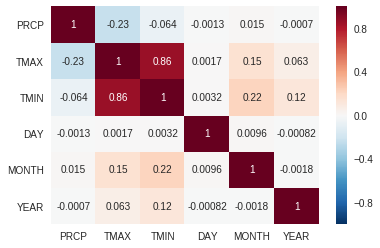

In [100]:
sns.heatmap(data.corr(),annot=True)

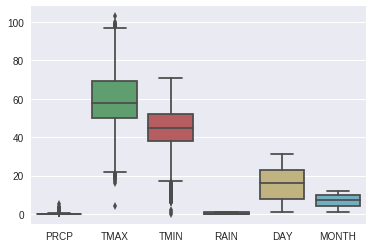

In [101]:
sns.boxplot(data=data.drop('YEAR',axis=1))

In [102]:
data = data.drop(data[(data['TMAX'] < 21.5) | (data['TMAX'] > 97)].index)
data = data.drop(data[data['TMIN'] < 18.5].index)
data = data.drop(data[data['PRCP'] > 1].index)

/home/vatsal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


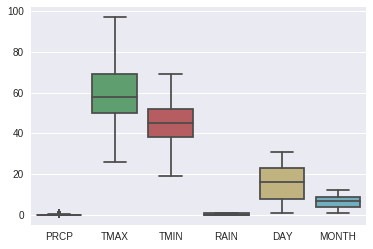

In [103]:
sns.boxplot(data.drop('YEAR',axis=1))

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


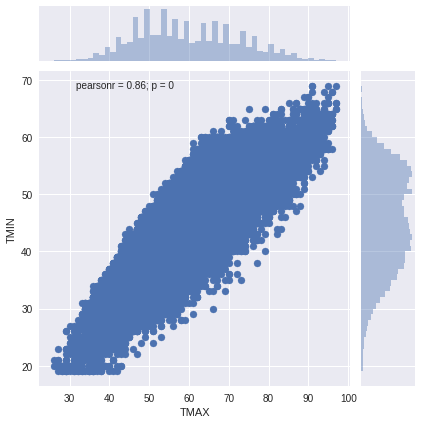

In [77]:
sns.jointplot(x='TMAX',y='TMIN',data=data)

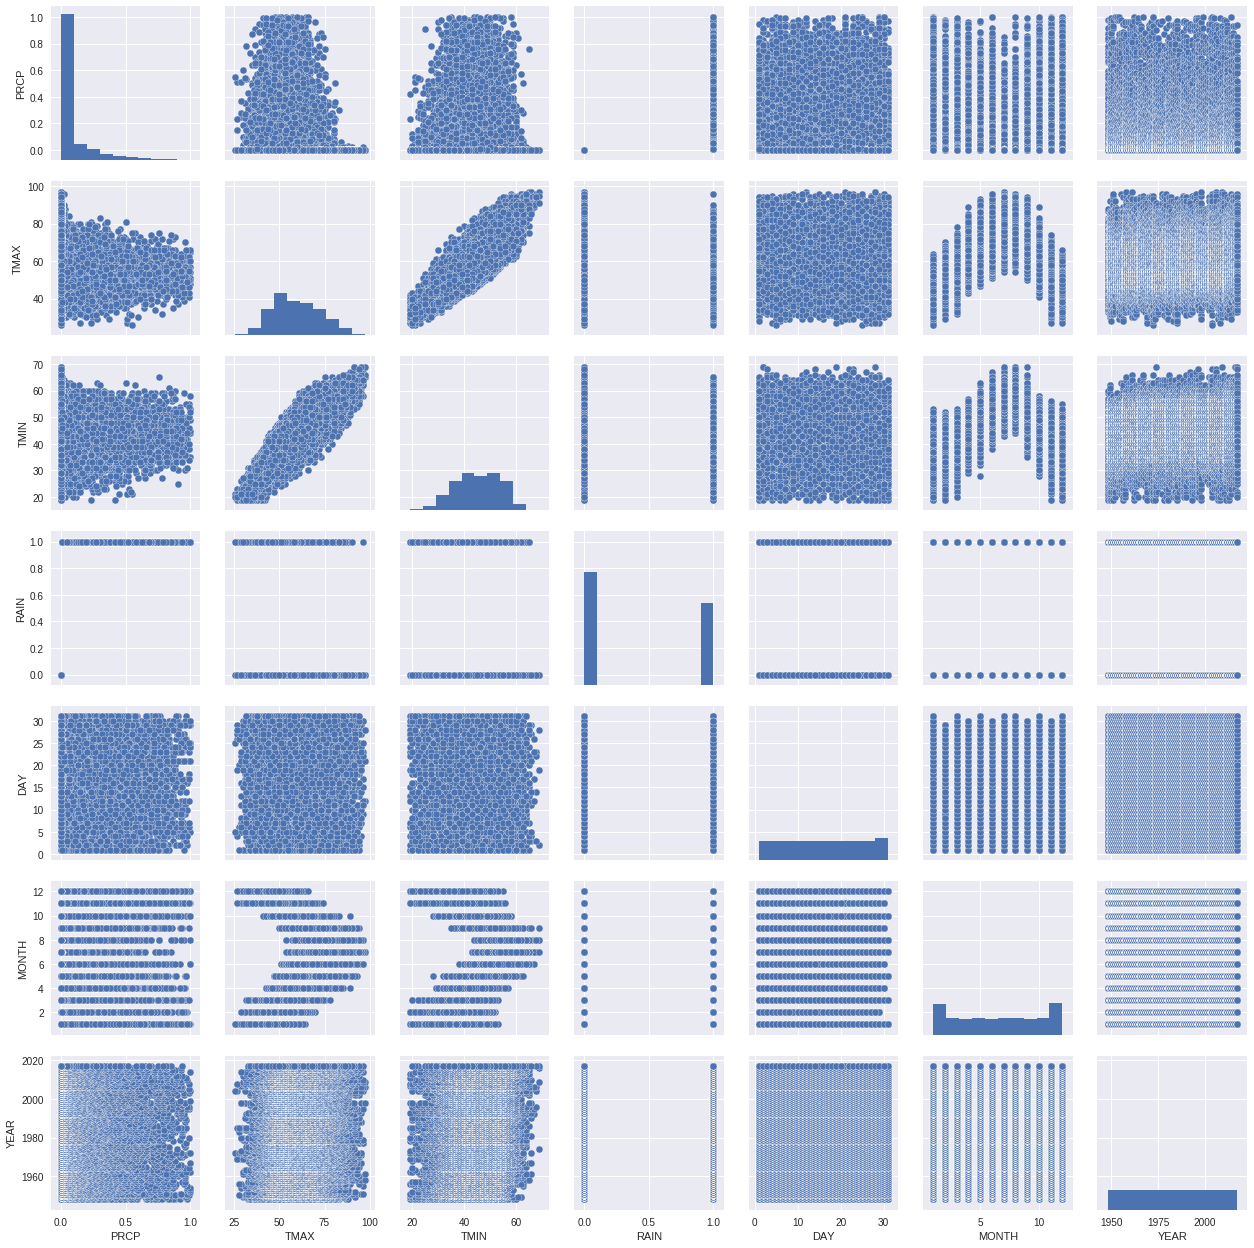

In [78]:
sns.pairplot(data)

In [104]:
data.head()

,PRCP,TMAX,TMIN,RAIN,DAY,MONTH,YEAR
0,0.47,51,42,True,1,1,1948
1,0.59,45,36,True,2,1,1948
2,0.42,45,35,True,3,1,1948
3,0.31,45,34,True,4,1,1948
4,0.17,45,32,True,5,1,1948


In [105]:
myle = LabelEncoder()
data['RAIN'] = myle.fit_transform(data['RAIN'])

In [106]:
data.head()

,PRCP,TMAX,TMIN,RAIN,DAY,MONTH,YEAR
0,0.47,51,42,1,1,1,1948
1,0.59,45,36,1,2,1,1948
2,0.42,45,35,1,3,1,1948
3,0.31,45,34,1,4,1,1948
4,0.17,45,32,1,5,1,1948


In [108]:
myss = StandardScaler()
X = data.drop('RAIN',axis=1)
Y = data['RAIN']
X = myss.fit_transform(X)

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [113]:
mylr = LogisticRegression()
mygnb = GaussianNB()
mysvc = SVC()
myrfc = RandomForestClassifier()

In [114]:
mylr.fit(x_train,y_train)
yp = mylr.predict(x_test)
metrics.confusion_matrix(y_test,yp)

array([[2892,    0],
       [ 146, 1975]])

In [115]:
mygnb.fit(x_train,y_train)
yp = mygnb.predict(x_test)
metrics.confusion_matrix(y_test,yp)

array([[2892,    0],
       [   0, 2121]])

In [116]:
mysvc.fit(x_train,y_train)
yp = mysvc.predict(x_test)
metrics.confusion_matrix(y_test,yp)

array([[2892,    0],
       [ 172, 1949]])

In [117]:
myrfc.fit(x_train,y_train)
yp = myrfc.predict(x_test)
metrics.confusion_matrix(y_test,yp)

array([[2892,    0],
       [   0, 2121]])